# linear SVM

In [14]:
#importing  Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
#create dataset for linear svm
dic={'Age':[13,24,58,6,77,34,46],'Memory_power':[4,9,5,7,6,5,8],'Exam':['f','p','p','f','p','f','p']}
dd=pd.DataFrame(dic)
dd

,Age,Memory_power,Exam
0,13,4,f
1,24,9,p
2,58,5,p
3,6,7,f
4,77,6,p
5,34,5,f
6,46,8,p


In [17]:
#spliting the dataset as train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(dd.iloc[:,:2],dd['Exam'],test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)

(5, 2)
(2, 2)


<Axes: xlabel='Age', ylabel='Memory_power'>

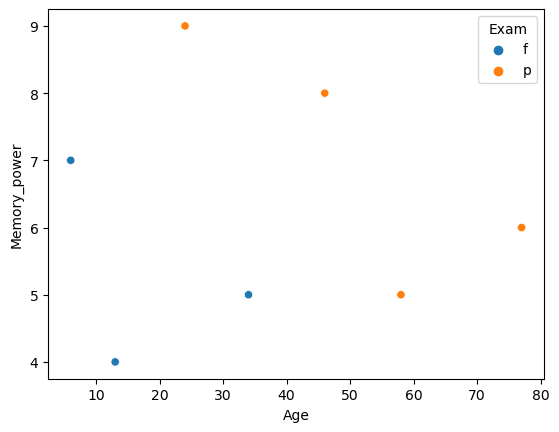

In [18]:
#using seaborn visualizing the datavalues
import seaborn as sns
sns.scatterplot(x='Age',y='Memory_power',hue='Exam',data=dd)

In [19]:
#apply svm algorithm for dataset
from sklearn import svm
mo=svm.SVC(kernel='linear')#SVC-Support Vector Classification." Support Vector Classification is a type of Support Vector Machine (SVM) algorithm used for classification tasks
mo.fit(x_train,y_train)

SVC(kernel='linear')

In [20]:
#predict the data by x_test
y_prd=mo.predict(x_test)

In [21]:
x_test

,Age,Memory_power
6,46,8
2,58,5


In [22]:
y_test

6    p
2    p
Name: Exam, dtype: object

In [23]:
y_prd

array(['p', 'p'], dtype=object)

In [24]:
#giving user input 16 as a age and 10 as memory power
y_prd2=mo.predict([[16,10]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [25]:
y_prd2

array(['f'], dtype=object)

In [26]:
mo.intercept_

array([-5.52098776])

In [27]:
mo.coef_

array([[0.04349629, 0.60853336]])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


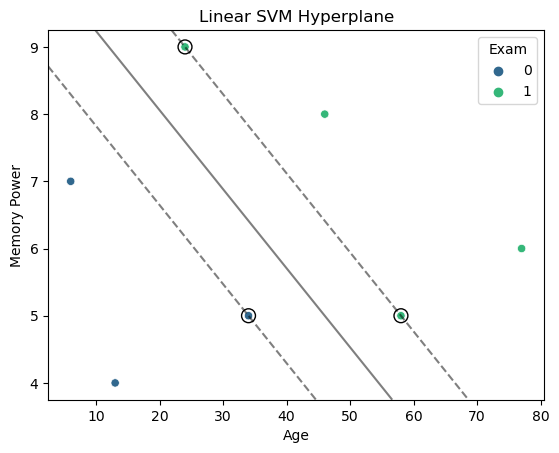

In [54]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Given data
data = {'Age': [13, 24, 58, 6, 77, 34, 46],
        'Memory_power': [4, 9, 5, 7, 6, 5, 8],
        'Exam': ['f', 'p', 'p', 'f', 'p', 'f', 'p']}

# Create a DataFrame
df = pd.DataFrame(data)

# Encode 'Exam' labels to numeric values
le = LabelEncoder()
df['Exam'] = le.fit_transform(df['Exam'])

# Features and target variable
X = df[['Age', 'Memory_power']]
y = df['Exam']

# Train a linear SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Scatter plot the data points
sns.scatterplot(x='Age', y='Memory_power', hue='Exam', data=df, palette='viridis', marker='o')

# Plot the decision boundary (hyperplane)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
'''
ax = plt.gca(): This line gets the current Axes (the region of the figure where the data is plotted) of the current figure. The plt.gca() function stands for "get current axes."

xlim = ax.get_xlim() and ylim = ax.get_ylim(): These lines retrieve the current limits of the x-axis and y-axis, respectively. These limits define the range of values displayed on the x-axis and y-axis in the plot.
'''
# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
'''
np.linspace(xlim[0], xlim[1], 50): This generates 50 evenly spaced values between xlim[0] and xlim[1]. It creates an array of x-coordinates.

np.linspace(ylim[0], ylim[1], 50): Similarly, this generates 50 evenly spaced values between ylim[0] and ylim[1]. It creates an array of y-coordinates.

np.meshgrid(...): This function takes these two arrays of x and y coordinates and returns two 2D arrays (xx and yy) representing the x and y coordinates of points in a grid. Each point in the grid corresponds to a combination of x and y coordinates.
'''
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
#svm_model.decision_function(...): This method computes the signed distance of each sample to the hyperplane. For binary classification, positive values indicate one class, and negative values indicate the other. The magnitude of the values indicates the confidence in the prediction.

'''
is using the decision_function method of the trained SVM model (svm_model) to calculate the decision values for each point in the feature space represented by the meshgrid (xx, yy). The resulting Z array contains these decision values.

Breaking it down:

np.c_[xx.ravel(), yy.ravel()]: This creates a 2D array by concatenating the flattened versions of xx and yy. The ravel() function flattens the arrays into 1D, and np.c_ is used for concatenation. This results in an array where each row represents a point in the feature space.
'''
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
'''
contour function to draw contour lines of the decision boundary and margins on a 2D plot. This visualization is helpful for understanding the separation of different classes in the feature space
'''
'''
levels=[-1, 0, 1]: Contour lines are drawn at the specified levels. In this case, contour lines are drawn at decision values of -1, 0, and 1.
'''

# Highlight support vectors
ax.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
'''
Support vectors are the data points that lie closest to the decision boundary (hyperplane) in a Support Vector Machine (SVM) model. 
'''

plt.title('Linear SVM Hyperplane')
plt.xlabel('Age')
plt.ylabel('Memory Power')
plt.show()

In [32]:
xx

array([[ 2.45      ,  4.04387755,  5.6377551 , ..., 77.3622449 ,
        78.95612245, 80.55      ],
       [ 2.45      ,  4.04387755,  5.6377551 , ..., 77.3622449 ,
        78.95612245, 80.55      ],
       [ 2.45      ,  4.04387755,  5.6377551 , ..., 77.3622449 ,
        78.95612245, 80.55      ],
       ...,
       [ 2.45      ,  4.04387755,  5.6377551 , ..., 77.3622449 ,
        78.95612245, 80.55      ],
       [ 2.45      ,  4.04387755,  5.6377551 , ..., 77.3622449 ,
        78.95612245, 80.55      ],
       [ 2.45      ,  4.04387755,  5.6377551 , ..., 77.3622449 ,
        78.95612245, 80.55      ]])

In [33]:
xlim

(2.4499999999999997, 80.55)

In [34]:
ylim

(3.75, 9.25)

In [37]:
Z.shape

(50, 50)

In [38]:
Z

array([[-4.51252778, -4.37976097, -4.24699416, ...,  1.72751235,
         1.86027916,  1.99304597],
       [-4.43305469, -4.30028788, -4.16752106, ...,  1.80698544,
         1.93975225,  2.07251906],
       [-4.3535816 , -4.22081478, -4.08804797, ...,  1.88645853,
         2.01922534,  2.15199215],
       ...,
       [-0.77729249, -0.64452568, -0.51175887, ...,  5.46274763,
         5.59551444,  5.72828126],
       [-0.6978194 , -0.56505259, -0.43228578, ...,  5.54222073,
         5.67498754,  5.80775435],
       [-0.61834631, -0.4855795 , -0.35281269, ...,  5.62169382,
         5.75446063,  5.88722744]])

In [39]:
xx.shape

(50, 50)

In [42]:
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [44]:
Z.shape

(2500,)

In [49]:
mo.decision_function(x_train)

array([ 0.9997235 , -1.0002765 , -2.52140252, -0.99944699,  1.47942699])

In [48]:
x_train

,Age,Memory_power
1,24,9
3,6,7
0,13,4
5,34,5
4,77,6


In [50]:
mo.support_vectors_

array([[ 6.,  7.],
       [34.,  5.],
       [24.,  9.]])

In [51]:
svm_model.support_vectors_[:, 0]

array([34., 24., 58.])

In [52]:
svm_model.support_vectors_[:, 1]

array([5., 9., 5.])

In [73]:
dd['Exam']

0    0
1    1
2    1
3    0
4    1
5    0
6    1
Name: Exam, dtype: int64